In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import meshgrid

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.initializers import he_normal, glorot_normal
def approximate_3d(y_func, epochs = 10, batch_size = 4, hidden_layers = [4], test_size = 0.5, init = 'glorot_normal', act = 'sigmoid'):
    # Train/test data
    x = np.arange(-1, 1, 0.1)
    y = np.arange(-1, 1, 0.1)
    
    X, Y = meshgrid(x, y)
    Z = f(X, Y)    
    
    train_data = np.array(list(zip(X.flatten(), Y.flatten())))
    labels = Z.flatten().reshape(-1, 1)
    
    # Train test split
    train_x, test_x, train_y, test_y = train_test_split(train_data, labels, test_size = test_size, shuffle = True)
    
    # Scaling data
    scaler_x = StandardScaler()
    scaler_y = StandardScaler()
    
    train_x = scaler_x.fit_transform(train_x)
    test_x = scaler_x.transform(test_x)
    
    train_y = scaler_y.fit_transform(train_y)
    test_y = scaler_y.transform(test_y)
    
    # Model
    if init == 'he_normal':
        init = he_normal(seed = 666)
    
    model = Sequential()    
    for i, l in enumerate(hidden_layers):
        model.add(Dense(l, kernel_initializer = init, activation = act))
    model.add(Dense(1, kernel_initializer = init))
    model.compile(optimizer = 'sgd', loss = 'mse')
    model.fit(train_x, train_y, epochs = epochs, batch_size = batch_size, validation_split = 0.1, verbose = 0)
    
    # Predictions
    preds = scaler_y.inverse_transform(model.predict(test_x)) # Preds on test data
    preds_train = scaler_y.inverse_transform(model.predict(train_x)) # Preds on train data
    
    # Inverse transform of data
    train_x = scaler_x.inverse_transform(train_x)
    test_x = scaler_x.inverse_transform(test_x)
    
    t_x = train_x[:, 0]
    t_y = train_x[:, 1]
    
    tr_x = test_x[:, 0]
    tr_y = test_x[:, 1]
    
    # Plotting results
    fig = plt.figure(figsize = (20, 8))
    
    # Learning curves plot
    plt.subplot(121)
    H = model.history.history
    plt.plot(H['loss'], label = 'loss')
    plt.plot(H['val_loss'], label = 'val_loss')
    plt.grid(); plt.legend()
    
    # Predictions plot    
    ax = fig.add_subplot(1, 2, 2, projection = '3d')
    ax.plot_wireframe(X, Y, Z, color = 'k', label = '$f(x)$', alpha = 0.4)
    ax.scatter(t_x, t_y, preds_train, c = 'y', label = 'Train_preds')
    ax.scatter(tr_x, tr_y, preds, c = 'g', label = 'Test_preds')
#     ax.legend()
    ax.view_init(25, 100)
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    #ax.view_init(90, -89)
    ax.view_init(30, -20)
    plt.show()

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


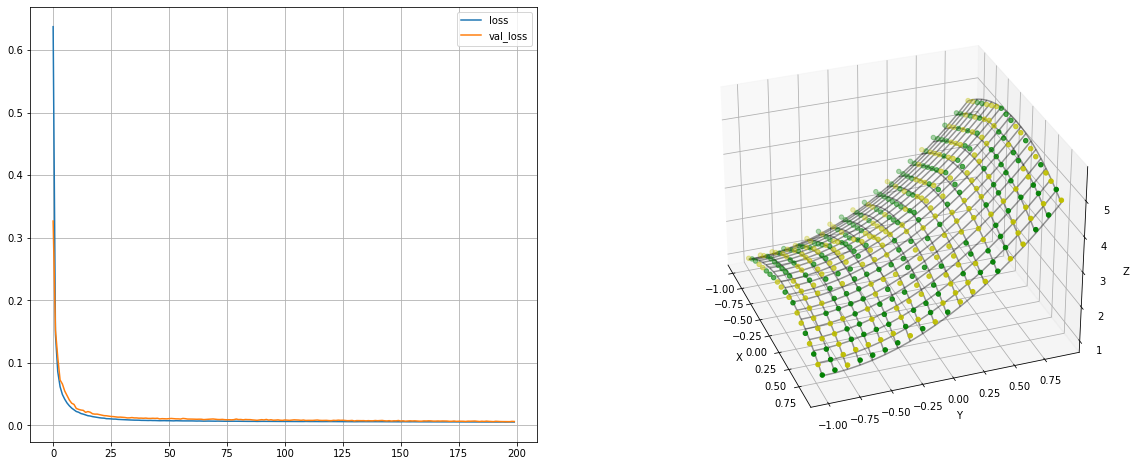

In [82]:
def f(x, y):
    return (2-x**2) + (1 + y)**2

approximate_3d(f, hidden_layers = [8], epochs = 200, act = 'relu', init = 'he_normal')